## 神经网络的学习

神经网络的特征就是从数据中学习。由数据决定权重参数的值。
    
> 对于线性可分问题，比如感知机可以利用数据自动学习。根据 **感知机收敛定理**，通过有限次数的学习，线性可分问题是可解的。但是，非线性可分问题是无法通过自动学习来解决。

### 数据驱动

数据是机器学习的核心。**特征量**，从输入的数据中准确地提取本质数据的转换器。机器学习方法中，由机器从收集的数据中找出规律性，与人工从零开始想出想法相比，这种方法更搞笑，大大减少了人工量。针对不同的问题，必须使用不同的特征量，才能得到更好的结果，所以即使使用特征量和机器学习的方法，也需要针对不同的问题人工考虑不同的特征量。

如下图，神经网络直接学习图像本身。在第二个方法中，利用特征量和机器学习的方法中，特征量仍然是人工设计的。而在神经网络中，连图像包含的重要特征量都是机器学习得来的。

![人工介入到机器学习](./img/neural_network_learning-1.png)
从人工设计规则转变为由机器从数据中学习：没有人为介入的方块灰色表示

> 深度学习有时也被称为是端到端的学习（end-to-end machine learning）。这里所说的端到端指的是从一端到另一端的意思，就是从原始数据（输入）获得目标结果（输出）的意思。

神经网络的优点：对所有的问题都可以用同样的流程来解决。比如不管是识别数字5，还是识别狗狗，识别人脸，神经网络都是通过不停地学习所提供的数据，尝试发现待求解的问题模式。也就是说与待求解的问题无关，神经网络可以把数据直接作为原始数据，进行“端对端”的学习。

### 训练集和测试集

机器学习中，一般先使用训练集来学习得到最优的参数，然后使用测试集数据来评价训练结果得到模型的实际能力。为了正确评价模型的**泛化能力**，必须划分训练集和测试集。训练数据也被称为**监督数据**。

### 损失函数

损失函数是表示神经网络性能的“恶劣程度”的指标，即当前神经网络对监督数据多大程度上不拟合，在多大程度上不一致。在神经网络学习中，一般使用**均方误差**和**交叉熵**作为损失函数。

#### 均方误差

公式：
![均方误差](./img/mean_squared_error.png)
y<sub>k</sub> 表示神经网络的输出，t<sub>k</sub> 表示监督数据，k表示数据的维度。

均方误差会计算神经网络的输出和正确解监督数据各个元素的差的平方，再求总和。python实现如下：

In [3]:
import numpy as np

def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)


# 手写数字识别 y 为输出 0-9 的数字的概率
# eg1:  设置 2 为正确解
t  = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 均方误差的结果：
ret = mean_squared_error(np.array(y),np.array(t))
print(ret)

# eg2: 设置 7 为正确解
t1 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

ret2 = mean_squared_error(np.array(y),np.array(t1))
print(ret2)

# 又结果可知：ret 的损失函数的值更小，和监督数据之间的误差更小。也就是说均方误差显示第一个例子的输出结果和监督数据更吻合。

0.09750000000000003
0.5975


### 交叉熵误差

除了均方误差，**交叉熵误差**也经常被用作损失函数。
![交叉熵误差](./img/cross_entropy_error.png)
这里，log表示以e为底数的自然对数（log<sub>e</sub>），y<sub>k</sub> 是神经网络的输出，t<sub>k</sub>是神经网络的正确解标签。并且t<sub>k</sub>中只有正确解标签的索引为1，其他均为0（one-hot）表示，上式实际上只计算对应正解标签的输出的自然对数。
> 比如正确解为2，对应的神经网络的输出是0.6，则交叉熵误差为 -log0.6 = 0.51；若 2 对应的输出是0.1，则交叉熵误差为 -log0.1 = 2.30。

***交叉熵误差的值是由正确解标签所对应的输出结果决定的。***

#### 自然对数应的函数图像：

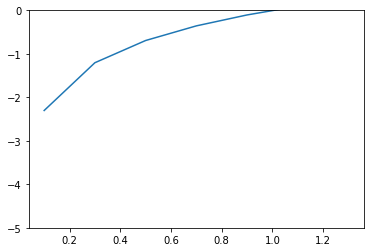

In [10]:
import matplotlib.pylab as plt

x = np.arange(0.1,1.5,0.2)
y = np.log(x)

plt.plot(x,y)
plt.ylim(-5,0)
plt.show()

#### 代码实现交叉熵误差：

In [11]:
def cross_entropy_error(y,t):
    delta = 1e-7 
    # 加上一个微小值，是为了避免 出现log(0)时，np.log(0) 会变得负无穷大
    return -np.sum(t*np.log(y+delta))

In [12]:
# 手写数字识别 y 为输出 0-9 的数字的概率
# eg1:  设置 2 为正确解
t  = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 均方误差的结果：
ret = cross_entropy_error(np.array(y),np.array(t))
print(ret)

# eg2: 设置 7 为正确解
t1 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

ret2 = cross_entropy_error(np.array(y),np.array(t1))
print(ret2)

0.510825457099338
2.302584092994546


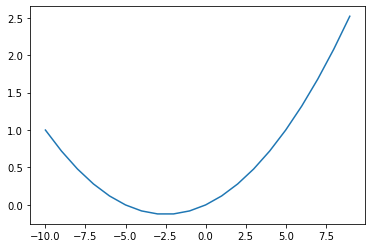

In [15]:
x = np.arange(-10,10,1)
y = 0.02*x**2+0.1*x

plt.plot(x,y)
plt.show()

#### mini-batch学习

机器学习使用训练数据进行学习，严格来讲就是根据训练数据计算损失函数的值，找出使该值尽可能小的参数，因此，计算损失函数时必须将所有训练数据作为对象。如果训练数据有100个的话，我们要把100个损失函数的总和作为学习指标。

前面介绍的都是单个数据的损失函数，如果需要所有训练数据的损失函数总和，以交叉熵为例，公式如下：
![mini-batch-cross-entropy-error](./img/mini_batch_cross_entropy_error.png)
这里假设数据有N个，t<sub>nk</sub>表示第n个数据的第k个元素的值（y<sub>nk</sub>神经网络的输出，t<sub>nk</sub>是监督数据），式子实际上就是把单个损失函数扩大至N份数据，不过最要除以N正规化。通过除以N，可以求出单个数据的**平均损失函数**，通过这样的平均，可以获得和训练数据无关的统一指标，比如，即便训练数据有1000个或者10000个，也可以求得单个数据的平均损失函数。

另外，如果训练数据特别大，达到百万千万级别，这种情况下对数据算损失函数是不现实的，因此我们可以从全部数据中抽取一部分数据，作为全部数据的“近似值”，神经网络的学习也是从全部数据中选取一部分数据，然后对每个mini-batch进行学习，这种学习方式称为 **mini-batch学习**。

下面来编写从训练数据中随机指定个数的数据代码，以进行mini-batch学习。
读取 MNIST 数据集
```py
import os,sys
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)
```
上面读入的数据有60000个，数据数据是784维（28*28）的图像数据，监督数据是10维的数据，因此，上面的x_train和t_train的形状分别是（60000,784），（60000,10），那么如何从这些数据中抽取10笔数据呢？可以使用numpy的 <code style="color:red;">np.random.choice() </code>,写成如下形式：
```py
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
```
<code>np.random.choice()</code> 可以从指定的数字中随机选择想要的数字，比如：<code>np.random.choice(60000,10)</code>会从0~59999中随机抽取10个数据:
```py
np.random.choice(60000,10)
# array([18610, 36981, 28383, 12181, 14357, 16130, 22624, 23076,  7907, 16269])
```
#### mini-batch版交叉熵误差实现

这里需要改良下之前单个数据的交叉熵误差的方式，让其能同时处理单个数据和多个数据情况的函数：

```py
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e - 7)) / batch_size
```
当 y 的维度为 1 时，这里需要改变下y的形状，并且当输入为mini-batch时，需要用batch的个数进行正规化，计算单个数据的平均交叉熵误差。

此外，当监督数据为标签形式（非one-hot表示，而是想 “2,7”这种标签），交叉熵误差可以通过以下实现：
```py
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + 1e - 7)) / batch_size
```

<code>y[np.arange(batch_size), t]</code> 进行说明：当batch_size = 5 时，<code>np.arange(batch_size)</code>生成数组：[0, 1, 2, 3, 4]，因为t的标签是：[2, 7, 0, 9, 4]的形式存储的，所以 <code>y[np.arange(batch_size),t]</code> 会生成数组：[y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]]。


#### 为何要设定损失函数

在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，逐步更新参数的值。

### 数值微分

#### 导数

导数就是表示某个瞬间的变化量。式子如下：

![导数](./img/derivative-1.png)
左边的符号 df(x)/dx 表示 f(x) 关于 x 的导数，即 f(x) 关于 x 的变化程度，表示的含义是：x 的“微小变化”将导致f(x)的值在多大程度上的变化，其中表示微小变化的h无限接近于0，表示为 lim<sub>(h->0)</sub>。

不好的实现：
```py
def numerical_diff(f, x):
    '''
    f: 函数 f(x)
    x: 传给函数 f(x)的参数 x
    '''
    h = 10e-50
    return (f(x + h) - f(x)) / h
```

numerical_diff 来源于 数值微分的英文 numerical differentiation，这个实现方式存在 **舍入误差**（rounding error），取 h 无限接近于 0,10e-50(有50个连续的,.0000....1)这个微小的值，所谓舍入误差，指因省略小数的精确部分的值而造成最终计算结果误差。

```py
np.float32(10e-50)
# 0.0
```

以上代码所示：10e-50的结果是 0 导致，numerical_diff() 无法计算。

另外，如下图，数值微分含有误差，为了减小这个误差，我们可以计算 f(x+h) 和 (x-h) 之间的差分，因为这种计算以 x 为中心点，计算他左右两边的差分，所以也称**中心差分**，而f(x+h) 和 x 称为**前向差分**。
![中心差分](./img/center-differentiation.png)

综上，改进数值微分：
```py
def numerical_diff(f, x):
    h = 10e- 4
    
    return (f(x+h) - f(x -h))/ (2*h)
```

#### 数值微分的例子

方程式：    y = 0.01x<sup>2</sup> + 0.1x ,求导： y'= 0.02x + 0.1

0.14000000000000123
0.200000000000089


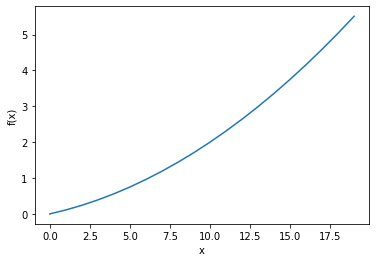

In [28]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

def numerical_diff(f,x):
    h = 10e-4
    return (f(x+h) - f(x-h))/(2*h)

# 求 x 分别为 2 和 5 的导数：
# y' = 0.02*2+0.1 = 0.14
# y' = 0.02*5+0.1 = 0.2

print(numerical_diff(function_1,2)) # 0.14000000000000123
print(numerical_diff(function_1,5)) # 0.200000000000089

# 由上可知： 计算的结果 0.14 ≈ 0.14000000000000123，0.2 ≈ 0.200000000000089

x = np.arange(0,20,1)
y = function_1(x)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


#### 偏导数

函数： $f(x_0,x_2) = x_0^2 + x_1^2$，把这里讨论的有多个变量的函数的导数称为偏导数。
三维图如下：
![二元二次方程](./img/3-ndim-function.png)

像这样，偏导数和单变量的导数一样，都是求某个地方的斜率。不过，偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为某个值。

### 梯度

像($\frac{αf} {αx_0},\frac{αf} {αx_1}$) 这样由全部变量的偏导汇总的向量称为**梯度**,梯度可以由下面来实现：

In [33]:
def numerical_gradient(f, x):
    h = 10e-4 # 0.001
    gradient = np.zeros_like(x)
    
    for i in range(x.size):
        tmp_value = x[i]
        # 计算 f(x+h) 的值
        x[i] = tmp_value + h
        fxh1 = f(x)
        
        # 计算 f(x-h) 的值
        x[i] = tmp_value - h
        fxh2 = f(x)
        
        gradient[i] = (fxh1 - fxh2) / (2*h)
        
    return gradient

In [38]:
def function_1(x):
    return np.sum(x**2)

x = np.array([10,20])
print(numerical_gradient(function_1,x))
# [ 9500 19500]

[ 9500 19500]


如下如所示，$f(x_0,x_1) = x_0^2 + x_1^2$ 的梯度呈现为有向向量（箭头），观察图可发现，发现梯度指向函数$f(x_0,x_1)$的最低处（最小值），就像指南针一样，所有箭头都指向同一个点。同时距离最低点越远，箭头越大。

![gradient-arrow](./img/gradient_arrow.png)

上图中，梯度指向了最低处，但是并非任何时候都这样，实际上梯度会指向各点处的函数值降低的方向。更严格来说，**梯度指向方向是各点处函数值减小最多的方向**。这是个非常重要的性质。

#### 梯度法

机器学习的主要任务是在学习时找到最优参数，同样的，神经网络必须在学习时找到最优参数（权重和偏置），这里所说的最优参数是指损失函数取最小值时的参数。但是一般而言，损失函数很复杂，参数空间庞大，我们不知道在何时能取到最小值。而通过巧妙地使用梯度来寻找函数最小值的方法就是**梯度法**。

梯度表示的是各点处的函数值减小最多的方向。因此，无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向。实际上，在复杂的函数中，梯度指示的方向往往不是函数值最小值。

虽然函数梯度的方向并不一定指向最小值，但沿着它的方向能最大限度地减小函数的值。因此在寻找函数最小值位置的任务中，要以梯度的信息作为线索，决定前进的方向。

在梯度法中，函数的取值从当前的位置沿着梯度的方向前进一段距离，然后在新的地方重新求梯度，再沿着新的方向前进，如此反复，不断地沿着梯度的方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是 **梯度法**。

> 寻找最小值的梯度法称为 梯度下降法，寻找最大值的梯度法叫做 梯度上升法。一般来说，神经网络（深度学习）主要使用梯度下降法。

用数学公式表示梯度法：

![gradient](./img/gradient-2.png)
式中，η表示更新量，在神经网络中表示**学习率**（learning rate）。学习率决定在一次学习中，学习多少，以及在多大程度上更新参数。

上式表示更新一次的式子，这个步骤会反复执行，通过反复执行，减小函数值。

学习率要事先确定某个值，比如 0.001 或者 0.0001 。一般而言，这个值过大或者过小都是无法抵达一个“最好的位置”，在神经网络中，一般会一边改变学习率的值，一边确认学习是否正确进行了。

使用python来实现梯度下降法：

In [39]:
def gradient_descent(f,init_x,l_rate=0.01,step_num=100):
    '''梯度下降法
    f: 需要优化的函数 f(x)
    init_x: 初始x的值
    l_rate: 学习率
    step_num: 重复的次数
    '''
    x = init_x
    
    for i in range(step_num):
        # 对 f 求导
        grad = numerical_gradient(f,x)        
        x -= l_rate * grad
    return x

使用上面这个函数顺利的话可以求函数的极小值。

例子: 用上述梯度下降法求 $f(x_0,x_1) = x_0^2 + x_1^2$的最小值

In [43]:
def function_1(x):
    return np.sum(x**2)

x = np.array([3.0,4.0])

print(gradient_descent(function_1,x,l_rate=0.1))
# [-0.005 -0.005] 并没有取到最小值，函数的最小值是 [0, 0]

# 学习率过大的例子 l_rate = 10.0
print(gradient_descent(function_1,x,l_rate=10.0))
# [3.33436482e+14 5.04564081e+14]

# 学习率过小的例子 l_rate = 10e-10
print(gradient_descent(function_1,x,l_rate=10e-10))
# [3.33436482e+14 5.04564081e+14]

[-0.005 -0.005]
[3.33436482e+14 5.04564081e+14]
[3.33436482e+14 5.04564081e+14]


用图来表示梯度下降法的更新过程：
![gradient-3](./img/gradient-3.png)

上述实验证明，当学习率过大时会散发很大的值，反过来学习率很小，基本上没怎么更新就结束了。也就是说设定合适的学习率是一个很重要的过程。


#### 神经网络的梯度

神经网络的学习也需要梯度，这里所说的梯度是指损失函数关于权重参数的梯度，比如有一个形状为 （2 x 3）的权重W 的神经网络，损失函数用 L 表示，此时梯度可以用  $\frac{αf} {αW}$ 表示，用数学表示的话：
![neural_gradient](./img/neural_gradient.png)

$\frac{\alpha L} {\alpha W}$ 的元素由各个元素关于W的偏导数构成。比如1行1列的元素，$\frac{\alpha L} {\alpha W_{11}}$ 表示当 $w_{11}$稍微变化时，损失函数发生多大的变化。这里的重点是 $\frac{\alpha L} {\alpha W}$ 的形状和 W 相同。

下面以一个简单的神经网络实现求梯度的代码：

In [67]:
import sys,os 
sys.path.append(os.pardir)
import numpy as np


class SimpleNet(object):
    
    def __init__(self):
        self.W = np.random.randn(2,3) # 使用高斯分布进行初始化
        
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 
        x = x - np.max(x) # 溢出对策
        return np.exp(x) / np.sum(np.exp(x))
        
    def cross_entropy_error(self, y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
        if t.size == y.size:
            t = t.argmax(axis=1)

        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)

        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)

            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)

            x[idx] = tmp_val # 还原值
            it.iternext()   
        return grad

        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
#         print(z)
        y = self.softmax(z)
#         print(y)
        loss = self.cross_entropy_error(y, t)
        
        return loss
    
    

In [76]:
net = SimpleNet()
x = np.array([0.6,0.9])
p = net.predict(x)
print(net.W)
print("\n")
print(p)
print(np.argmax(p))

[[ 0.84075484  0.65305556 -1.21727999]
 [-1.0003639  -3.42380727 -0.8413993 ]]


[-0.39587461 -2.68959321 -1.48762737]
0


In [74]:
t = np.array([0,0,1])
net.loss(x,t)

0.6822055730042766

In [77]:
# 求梯度
f = lambda w: net.loss(x,t)
dw = net.numerical_gradient(f,net.W)
print(dw)

[[ 0.41767637  0.04213962 -0.45981598]
 [ 0.62651455  0.06320942 -0.68972397]]
